In [58]:
import pandas as pd
import numpy
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [27]:
msft = pd.read_csv("data/MSFT.csv", parse_dates=['Date'])
gs = pd.read_csv("data/GS.csv", parse_dates=['Date'])
tsla = pd.read_csv("data/TSLA.csv", parse_dates=['Date'])
v = pd.read_csv("data/V.csv", parse_dates=['Date'])
aapl = pd.read_csv("data/AAPL.csv", parse_dates=['Date'])

In [28]:
msft.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
353,2013-05-31,34.820000,35.279999,34.790001,34.900002,29.547039,56165700
1335,2017-04-25,67.900002,68.040001,67.599998,67.919998,63.649605,30242700
768,2015-01-23,47.360001,47.389999,46.799999,47.180000,41.639881,26211600
2301,2021-02-25,232.080002,234.589996,227.880005,228.990005,228.025925,39542200
100,2012-05-25,29.200001,29.360001,29.010000,29.059999,23.875193,29507200


In [36]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03
mean,94.626551,95.494815,93.741620,94.678880,90.737950,3.400731e+07
std,73.521419,74.215372,72.832065,73.589541,74.979446,1.802483e+07
min,26.379999,26.629999,26.260000,26.370001,21.707487,7.425600e+06
25%,41.167502,41.595000,40.837502,41.240000,36.221183,2.285898e+07
50%,60.994999,61.395000,60.805000,61.105000,56.918037,2.965320e+07
75%,127.842502,129.417496,127.082500,128.129997,124.999542,3.969452e+07
max,338.510010,338.790009,334.529999,336.989990,336.989990,2.484285e+08


In [30]:
msft.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [35]:
msft.iloc[0,:]

Date         2012-01-03 00:00:00
Open                   26.549999
High                   26.959999
Low                    26.389999
Close                      26.77
Adj Close              21.707487
Volume                  64731500
Name: 0, dtype: object

In [40]:
# first date
print(msft.Date.min())
assert msft.Date.min() == gs.Date.min()

2012-01-03 00:00:00


In [33]:
datetime.datetime(2012,1,1)

datetime.datetime(2012, 1, 1, 0, 0)

In [53]:
msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

array([26.77])

In [54]:
msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

0        1.000000
1        1.023534
2        1.033993
3        1.050056
4        1.036235
          ...    
2477    12.567800
2478    12.553605
2479    12.588345
2480    12.549496
2481    12.357116
Name: Close, Length: 2482, dtype: float64

In [55]:
# add new column for the relative price to the first day in our df
msft["Rel_price"] = msft.Close / msft[msft.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
v["Rel_price"] = v.Close / v[v.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
aapl["Rel_price"] = aapl.Close / aapl[aapl.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
tsla["Rel_price"] = tsla.Close / tsla[tsla.Date==datetime.datetime(2012,1,3)].Close.to_numpy()
gs["Rel_price"] = gs.Close / gs[gs.Date==datetime.datetime(2012,1,3)].Close.to_numpy()

In [66]:
msft["Company"] = "MICROSOFT"
v["Company"] = "VISA"
aapl["Company"] = "APPLE"
tsla["Company"] = "TESLA"
gs["Company"] = "GOLDMAN SACHS"

In [104]:
from functools import reduce

data_frames = [msft, v, aapl, tsla, gs]
stock_df = pd.DataFrame()

for df in data_frames:
    stock_df = pd.concat([stock_df, df])

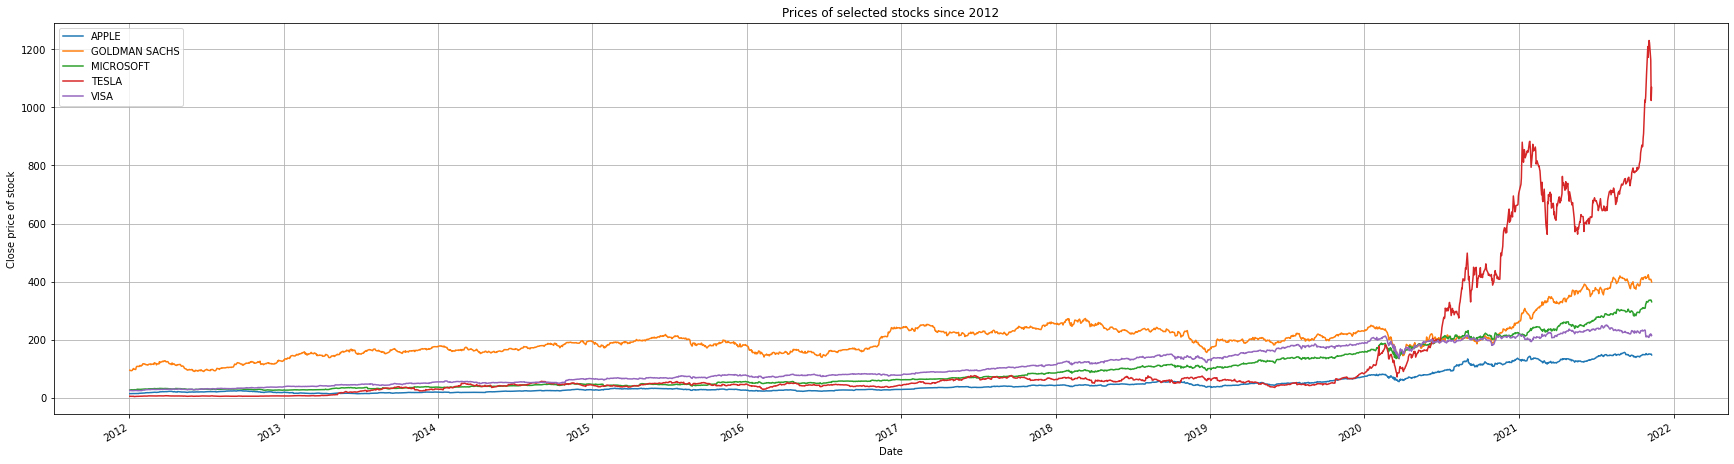

In [123]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Close', label=key)

plt.legend(loc='best')
plt.title("Prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.grid()
plt.show()

The close value doesn't tell us which stock did best throughout the whole period. For this, we need to check the relative price to the price of the first day in the period.

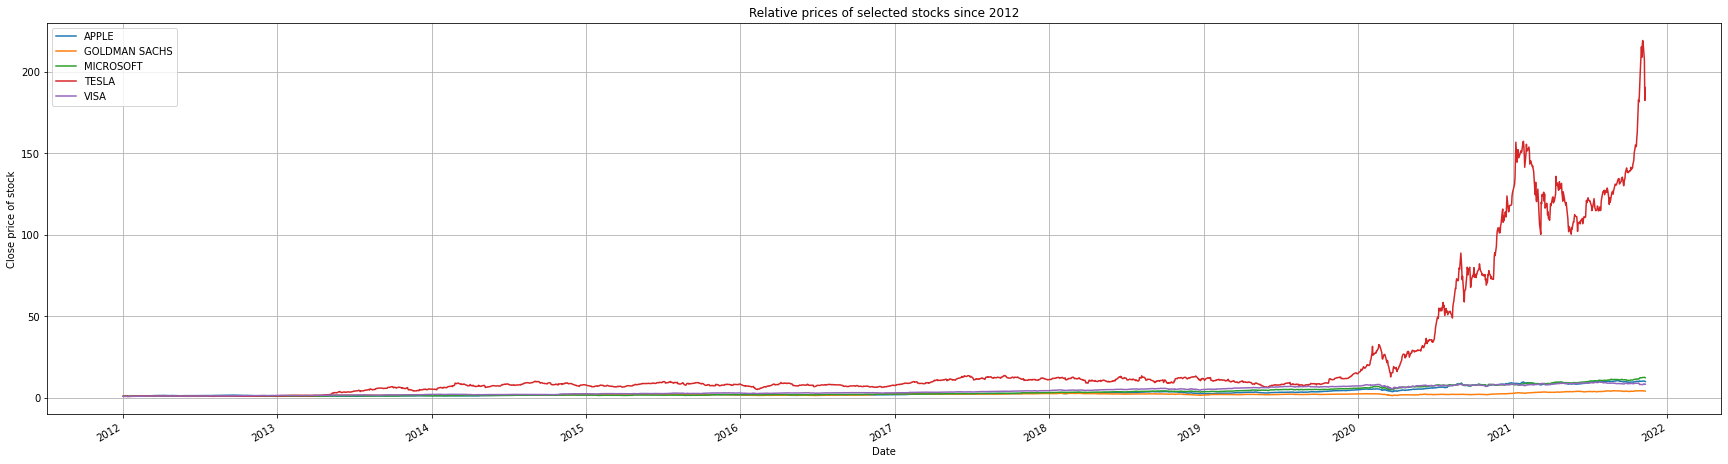

In [124]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key)

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012")
plt.ylabel("Close price of stock")
plt.grid()
plt.show()

This clearly presents tesla as the best choice investment when investing for the whole span. However, we are interested also in some short period gains.
 
First let's see the relative prices without TSLA.

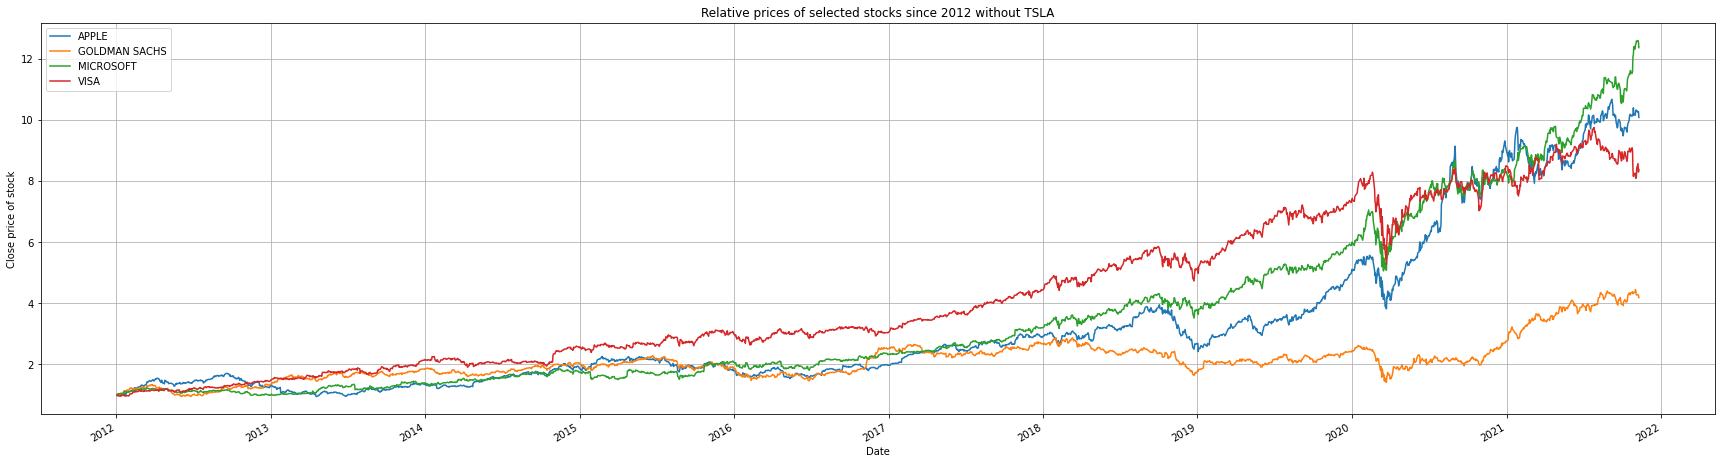

In [128]:
fig, ax = plt.subplots(figsize=(30,8))

for key, grp in stock_df.groupby(['Company']):
    if key != "TESLA":
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Rel_price', label=key)

plt.legend(loc='best')
plt.title("Relative prices of selected stocks since 2012 without TSLA")
plt.ylabel("Close price of stock")
plt.grid()
plt.show()

In [95]:
# could be useful later on
stock_df.pivot(index="Date", columns="Company", values="Close")

Company,APPLE,GOLDMAN SACHS,MICROSOFT,TESLA,VISA
Date,,,,,
2012-01-03,14.686786,95.360001,26.770000,5.616000,25.747499
2012-01-04,14.765714,94.739998,27.400000,5.542000,25.287500
2012-01-05,14.929643,94.580002,27.680000,5.424000,25.477501
2012-01-06,15.085714,93.419998,28.110001,5.382000,25.177500
2012-01-09,15.061786,94.690002,27.740000,5.450000,24.975000
...,...,...,...,...,...
2021-11-04,150.960007,408.070007,336.440002,1229.910034,208.779999
2021-11-05,151.279999,407.079987,336.059998,1222.089966,216.669998
2021-11-08,150.440002,408.339996,336.989990,1162.939941,220.490005
